In [1]:
import numpy as np
from matplotlib import pyplot as plt

from rgg.diffuser_utils import get_dataset
from rgg.plot_utils import plot_locomotion_observations

pybullet build time: May 20 2022 19:44:17


In [2]:
class Args:
    env_name = 'halfcheetah-medium-v2'
    data_path = '../../logs/data/halfcheetah-medium-v2-H32-T20/500000_finish.npz'
    score_path = '../../logs/data/halfcheetah-medium-v2-H32-T20/500000_finish_restoration_gaps.npy'
    planning_horizon = 32
    
args = Args()

normalizer = get_dataset(args.env_name).normalizer

data = np.load(args.data_path)
plan_observations = data['plan_observations']
plan_actions = data['plan_actions']

restoration_gaps = np.load(args.score_path)
sorted_idxs = np.argsort(restoration_gaps)[::-1] 

load datafile: 100%|█████████████████████████████████████████████████████| 21/21 [00:02<00:00,  7.71it/s]


[ datasets/buffer ] Finalized replay buffer | 1000 episodes
[ datasets/buffer ] Fields:
    actions: (1000, 1000, 6)
    infos/action_log_probs: (1000, 1000, 1)
    infos/qpos: (1000, 1000, 9)
    infos/qvel: (1000, 1000, 9)
    next_observations: (1000, 1000, 17)
    observations: (1000, 1000, 17)
    rewards: (1000, 1000, 1)
    terminals: (1000, 1000, 1)
    timeouts: (1000, 1000, 1)
    normed_observations: (1000, 1000, 17)
    normed_actions: (1000, 1000, 6)


# High restoration gap

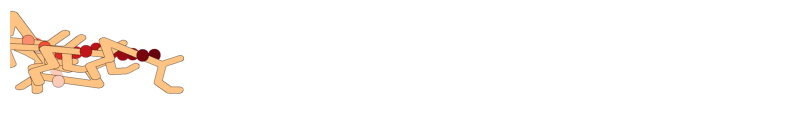

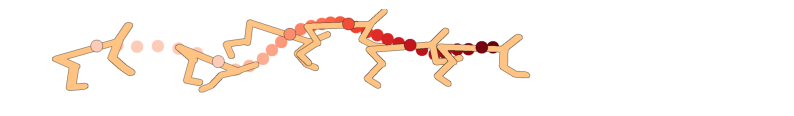

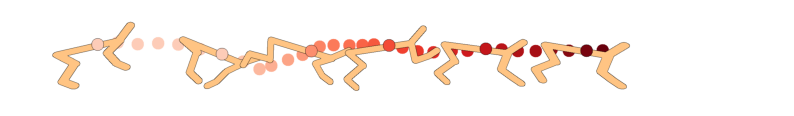

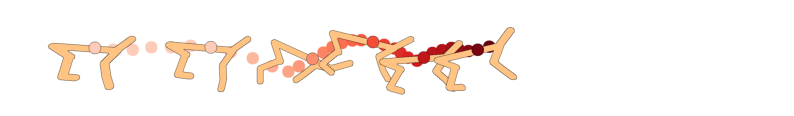

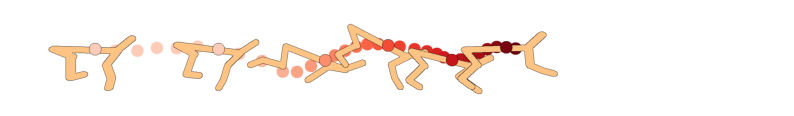

In [3]:
for i in range(1, 251, 50):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    observations = plan_observations[sorted_idxs[i]]
    plot_locomotion_observations(
        args.env_name, observations, ax=ax, img_width=3024, img_height=512, skip_frame=6, edge_only=True
    )
    plt.xlim([500, 3000])
    plt.ylim([512, 200])
    plt.axis('off')

# Low restoration gap

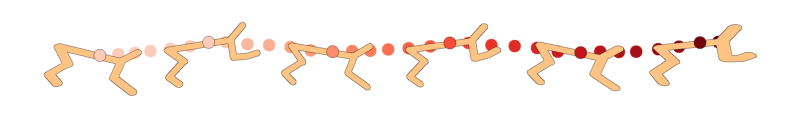

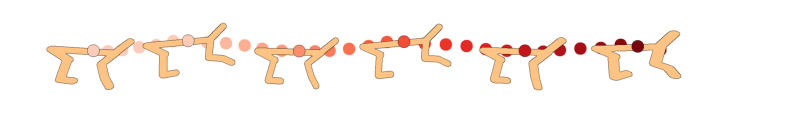

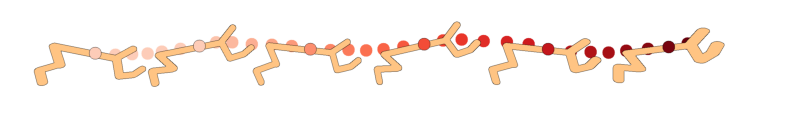

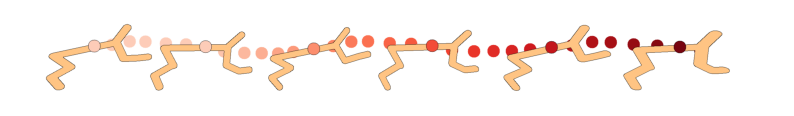

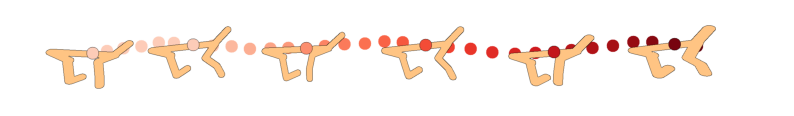

In [4]:
for i in range(1, 251, 50):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    observations = plan_observations[sorted_idxs[-i]]
    plot_locomotion_observations(
        args.env_name, observations, ax=ax, img_width=3024, img_height=512, skip_frame=6, edge_only=True
    )
    plt.xlim([500, 3000])
    plt.ylim([512, 200])
    plt.axis('off')